In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential   # https://keras.io/guides/sequential_model/
from keras.layers import Dense

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_sample_weight

In [5]:
df = pd.read_csv('netflix_userbase.csv')

# Data preprocessing

In [6]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
# CREATING A CLEANED DATAFRAME WITH ONLY USEFUL FEATURES
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format = "%d-%m-%y")

df['Join Date'] = pd.to_datetime(df['Join Date'], format = "%d-%m-%y")

max_value = max(df['Last Payment Date'])
min_value = min(df['Last Payment Date'])


df['Churned'] = df.apply(lambda r : 'No' if (r['Last Payment Date'] - r['Join Date']).days >= 365 else 'Yes', axis=1)
data_training = df.drop(columns= ['Plan Duration', 'User ID', 'Join Date', 'Last Payment Date'])
data_training

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Churned
0,Basic,10,United States,28,Male,Smartphone,No
1,Premium,15,Canada,35,Female,Tablet,No
2,Standard,12,United Kingdom,42,Male,Smart TV,Yes
3,Standard,12,Australia,51,Female,Laptop,Yes
4,Basic,10,Germany,33,Male,Smartphone,Yes
...,...,...,...,...,...,...,...
2495,Premium,14,Spain,28,Female,Smart TV,Yes
2496,Basic,15,Spain,33,Female,Smart TV,Yes
2497,Standard,12,United States,38,Male,Laptop,Yes
2498,Standard,13,Canada,48,Female,Tablet,Yes


In [8]:
df_churned = df[(df['Last Payment Date'] - df['Join Date']).dt.days >= 365] 

churned_rate = ((df['User ID'].nunique() - df_churned.shape[0])/ df['User ID'].nunique()) * 100
churned_rate 

82.16

# Neural Networks

In [9]:
# NEURAL NETWORK 1 
X = data_training[['Age']].values
y = data_training['Churned']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


le = LabelEncoder()

Y_train = le.fit_transform(Y_train)

Y_test = le.fit_transform(Y_test)



#neural network
clf = MLPClassifier(hidden_layer_sizes = 100, solver='lbfgs', activation = 'relu')

clf.fit(X_train, Y_train)
yp = clf.predict(X_test)

accuracy = accuracy_score(Y_test, yp)
accuracy

0.798

In [10]:
#NEURAL NETWORK USING CONTRY AS A FEATURE

#put the data in binary

X =  pd.get_dummies(data_training['Country'])
y = data_training['Churned']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


le = LabelEncoder()

Y_train = le.fit_transform(Y_train)

Y_test = le.fit_transform(Y_test)


#sample_weights = compute_sample_weight(class_weight= 'balanced', y=Y_train)
#neural network
clf = MLPClassifier(hidden_layer_sizes = (10,), solver='lbfgs', activation = 'relu')

clf.fit(X_train, Y_train)
yp = clf.predict(X_test)

accuracy = accuracy_score(Y_test, yp)
accuracy

0.834

In [11]:

#NEURAL NETWORK USING CONTRY AND GENDER

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



#put the data in binary

X1= pd.get_dummies(data_training['Country'])
X2 = pd.get_dummies(data_training['Gender'])
#X3 = pd.get_dummies(data_training['Age'])
#X4 = pd.get_dummies(data_training['Subscription Type'])
X = np.concatenate([X1, X2], axis=1)

y = data_training['Churned']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


le = LabelEncoder()

Y_train = le.fit_transform(Y_train)

Y_test = le.fit_transform(Y_test)



#neural network
clf = MLPClassifier(hidden_layer_sizes = (10,), solver='lbfgs', activation = 'relu')

clf.fit(X_train, Y_train)
yp = clf.predict(X_test)

accuracy = accuracy_score(Y_test, yp)
accuracy

0.846

In [12]:
#NEURAL NETWORK USING Subscription Type AND Monthly Revenue

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



#put the data in binary

X1= pd.get_dummies(data_training['Subscription Type'])
X2 = pd.get_dummies(data_training['Monthly Revenue'])
#X3 = pd.get_dummies(data_training['Age'])
#X4 = pd.get_dummies(data_training['Subscription Type'])
X = np.concatenate([X1, X2], axis=1)

y = data_training['Churned']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


le = LabelEncoder()

Y_train = le.fit_transform(Y_train)

Y_test = le.fit_transform(Y_test)



#neural network
clf = MLPClassifier(hidden_layer_sizes = (10,), solver='lbfgs', activation = 'relu')

clf.fit(X_train, Y_train)
yp = clf.predict(X_test)

accuracy = accuracy_score(Y_test, yp)
accuracy

0.834

In [10]:
#NEURAL NETWORK USING CONTRY AND AGE AS A FEATURE, THIS TIME USING A SEQUENTIAL MODEL AND USING EPOCHS

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf

from tensorflow.keras.layers import Dense


X1= pd.get_dummies(data_training['Country'])
X2 = pd.get_dummies(data_training['Gender'])
X3 = pd.get_dummies(data_training['Age'])
X4 = pd.get_dummies(data_training['Subscription Type'])
X = np.concatenate([X1, X2], axis=1)

y = pd.get_dummies(data_training['Churned'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


model = Sequential()
#model.add(Dropout(0.2))

model.add(Dense(10, activation='relu', input_dim = X.shape[1]))
model.add(Dense(2, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, y, epochs=100, validation_split=0.2, batch_size=32)

accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
accuracy

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 0.7603 - accuracy: 0.2865 - val_loss: 0.6952 - val_accuracy: 0.3900
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.7050 - val_loss: 0.5359 - val_accuracy: 0.9920
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7790 - val_loss: 0.4085 - val_accuracy: 0.9920
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7790 - val_loss: 0.3300 - val_accuracy: 0.9920
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7790 - val_loss: 0.2905 - val_accuracy: 0.9920
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.7790 - val_loss: 0.2772 - val_accuracy: 0.9920
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7790 - val_loss: 0.2713 - val_accuracy: 0.9920
Epoch 8/100
6

0.8360000252723694

# Decision Trees

In [3]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters for decision trees:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters for decision trees: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = pd.get_dummies(data_training.drop(columns=['Churned']))
y = data_training['Churned']

y = y.map({'Yes':1, 'No':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision tree accuracy: {accuracy:.2f}")

Decision tree accuracy: 0.66


# Random Forest

In [24]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy'
)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for random forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

Best parameters for random forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, min_samples_leaf=1, min_samples_split=2, max_features='sqrt')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random forest accuracy:", accuracy_score(y_test, y_pred_rf))

Random forest accuracy: 0.822


# Visualizations

In [75]:
# clean up some stuff

expected_features = rf_model.feature_names_in_
X_train = X_train.reindex(columns=expected_features, fill_value=0)
X_test_processed = X_test_processed.reindex(columns=expected_features, fill_value=0)

data_training = df.copy()
data_training['Churned'] = data_training.apply(
    lambda r: 'No' if (r['Last Payment Date'] - r['Join Date']).days >= 365 else 'Yes', axis=1
)

data_training['Churned'] = data_training['Churned'].map({'Yes': 1, 'No': 0})

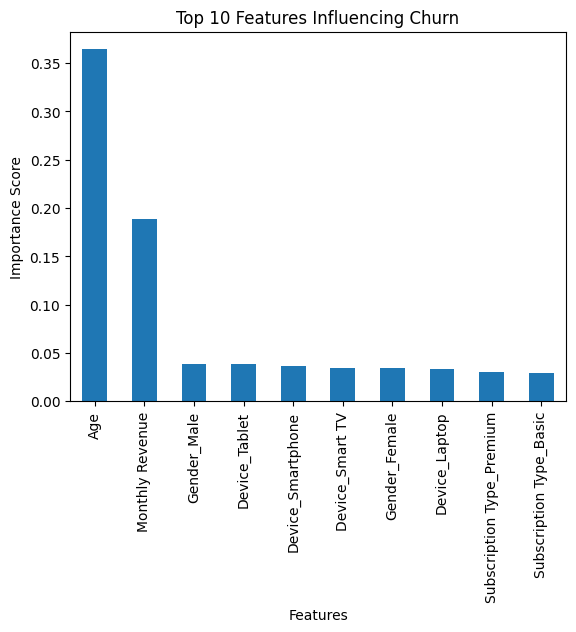

In [72]:
feature_names = rf_model.feature_names_in_
feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names)
feature_importances.nlargest(10).plot(kind='bar')

plt.title('Top 10 Features Influencing Churn')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

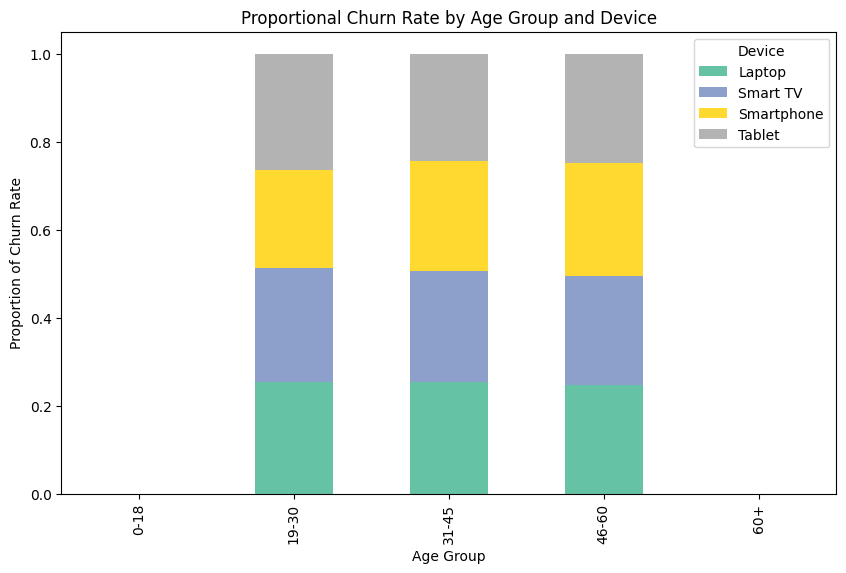

In [73]:
churn_by_age_device = churn_by_age_device.div(churn_by_age_device.sum(axis=1), axis=0)
churn_by_age_device.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Proportional Churn Rate by Age Group and Device')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Churn Rate')
plt.legend(title='Device')
plt.show()

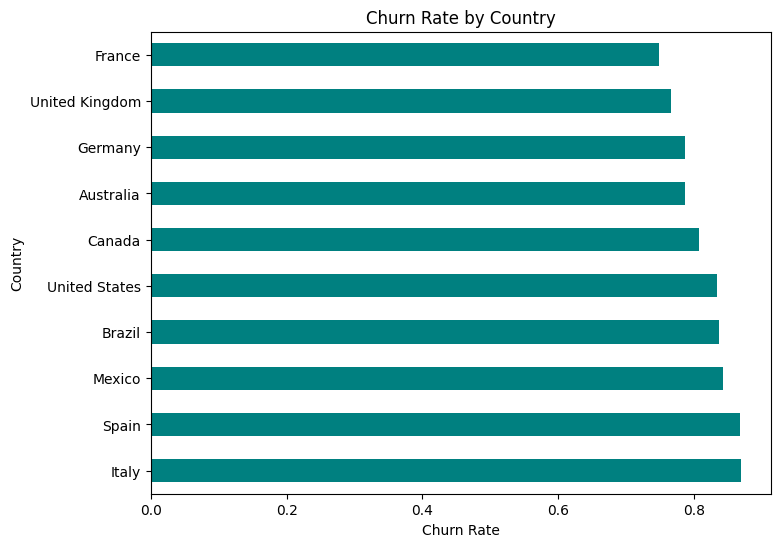

In [74]:
churn_by_country = data_training.groupby('Country')['Churned'].mean().sort_values(ascending=False)
churn_by_country.plot(kind='barh', figsize=(8, 6), color='teal')
plt.title('Churn Rate by Country')
plt.xlabel('Churn Rate')
plt.ylabel('Country')
plt.show()

# K-Means Analysis

In [18]:
import pandas as pd

file_path = 'netflix_userbase.csv'
netflix_data = pd.read_csv(file_path)

netflix_data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [19]:
missing_values = netflix_data.isnull().sum()
data_types = netflix_data.dtypes

missing_values, data_types

(User ID              0
 Subscription Type    0
 Monthly Revenue      0
 Join Date            0
 Last Payment Date    0
 Country              0
 Age                  0
 Gender               0
 Device               0
 Plan Duration        0
 dtype: int64,
 User ID               int64
 Subscription Type    object
 Monthly Revenue       int64
 Join Date            object
 Last Payment Date    object
 Country              object
 Age                   int64
 Gender               object
 Device               object
 Plan Duration        object
 dtype: object)

In [20]:
netflix_data['Join Date'] = pd.to_datetime(netflix_data['Join Date'], format='%d-%m-%y')
netflix_data['Last Payment Date'] = pd.to_datetime(netflix_data['Last Payment Date'], format='%d-%m-%y')

duplicates_count = netflix_data.duplicated().sum()

updated_data_types = netflix_data.dtypes
updated_data_types, duplicates_count

(User ID                       int64
 Subscription Type            object
 Monthly Revenue               int64
 Join Date            datetime64[ns]
 Last Payment Date    datetime64[ns]
 Country                      object
 Age                           int64
 Gender                       object
 Device                       object
 Plan Duration                object
 dtype: object,
 0)

In [21]:
encoded_data = pd.get_dummies(netflix_data, columns=[
    'Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration'], drop_first=True)

encoded_data.head()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,1,10,2022-01-15,2023-06-10,28,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
1,2,15,2021-09-05,2023-06-22,35,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,3,12,2023-02-28,2023-06-27,42,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False
3,4,12,2022-07-10,2023-06-26,51,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,10,2023-05-01,2023-06-28,33,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Age', 'Monthly Revenue']
encoded_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns])
final_data = encoded_data.drop(columns=['User ID', 'Join Date', 'Last Payment Date'])

final_data.head()

,Monthly Revenue,Age,Subscription Type_Premium,Subscription Type_Standard,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,-1.487328,-1.505590,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
1,1.477367,-0.529347,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,-0.301450,0.446896,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False
3,-0.301450,1.702066,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,-1.487328,-0.808274,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False


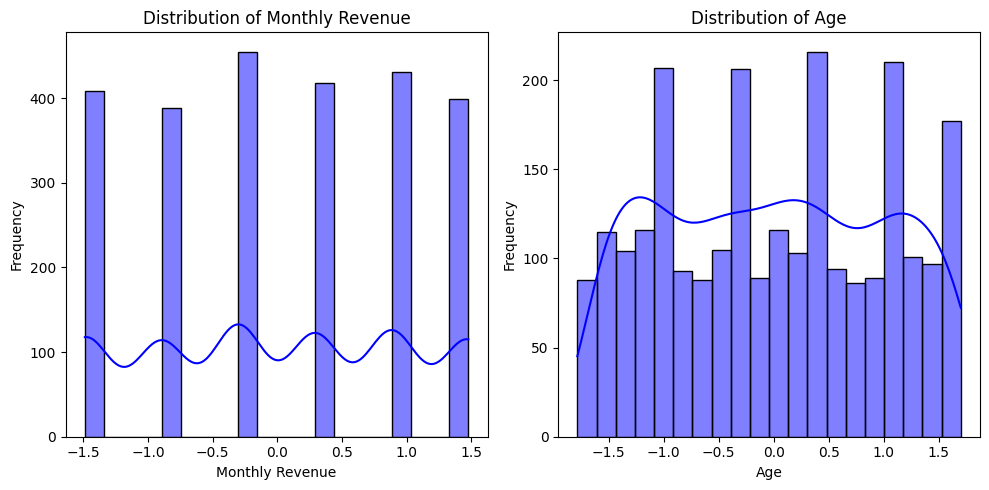

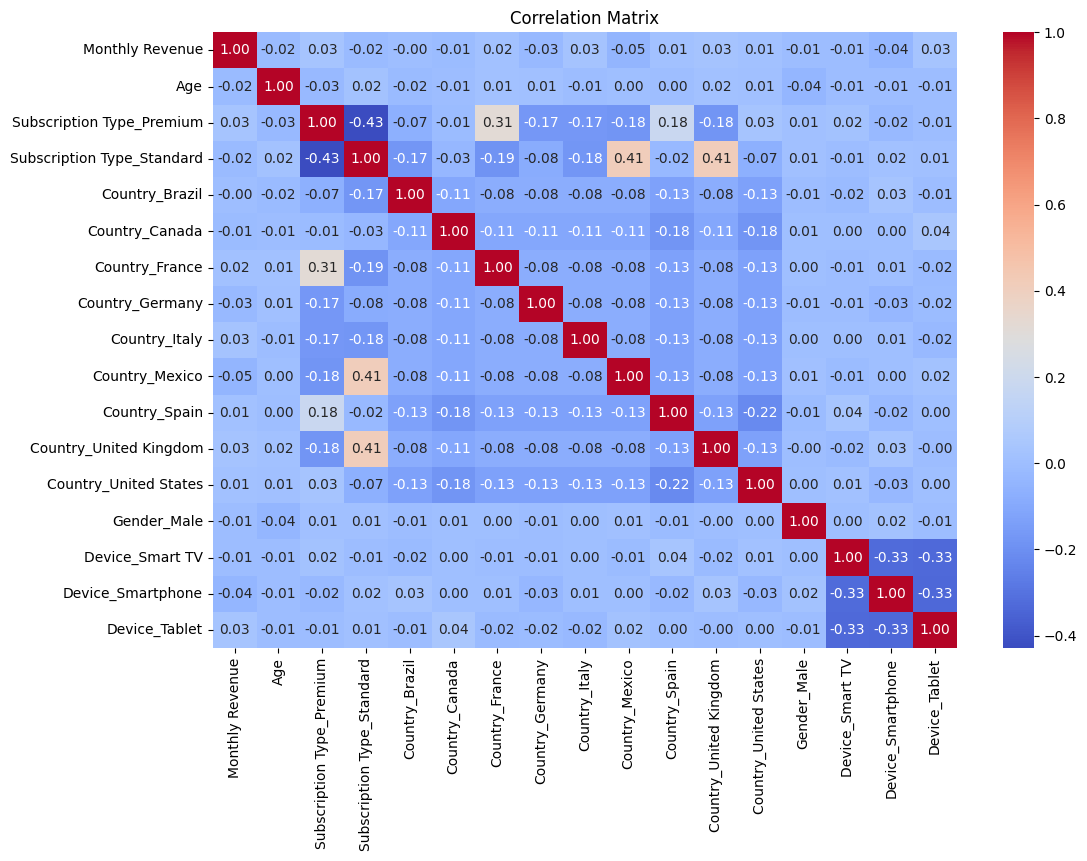

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


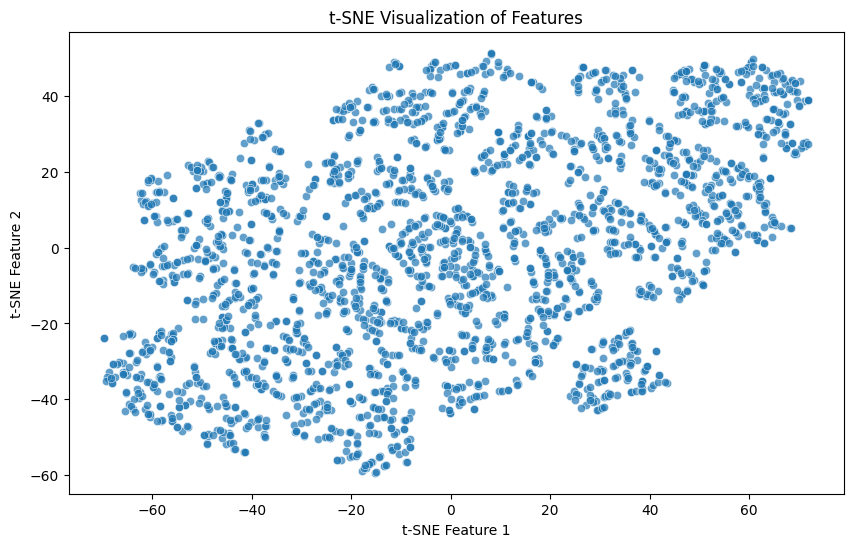

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
for i, col in enumerate(['Monthly Revenue', 'Age']):
    plt.subplot(1, 2, i + 1)
    sns.histplot(final_data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = final_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(final_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], alpha=0.7)
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

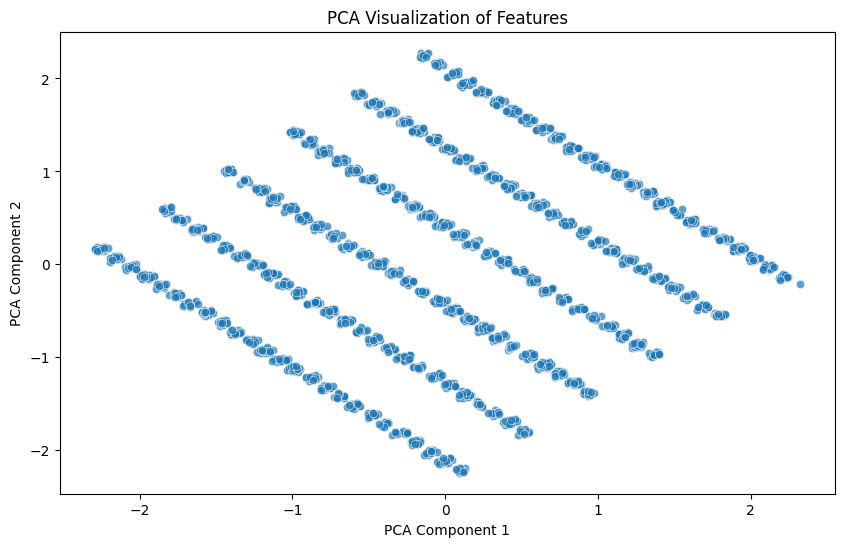

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_results = pca.fit_transform(final_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], alpha=0.7)
plt.title('PCA Visualization of Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

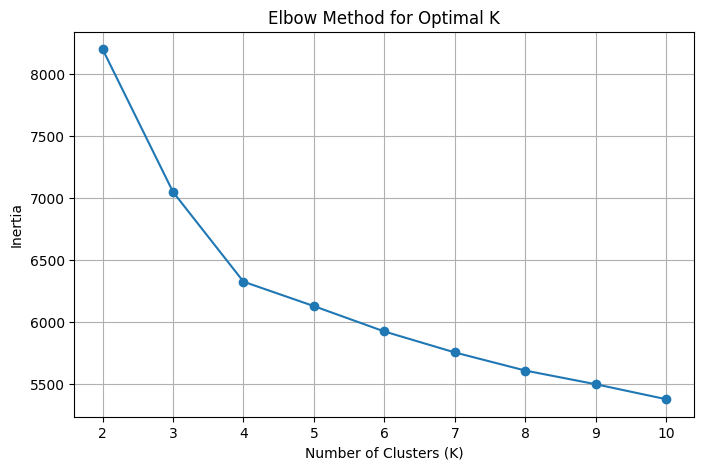

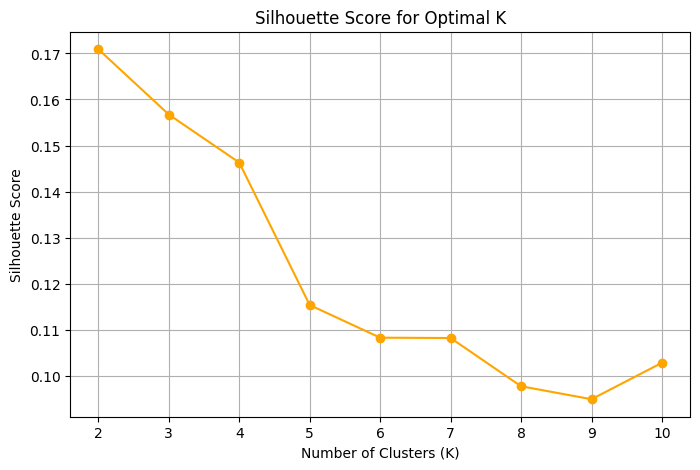

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(final_data)
    silhouette_scores.append(silhouette_score(final_data, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
plt.show()

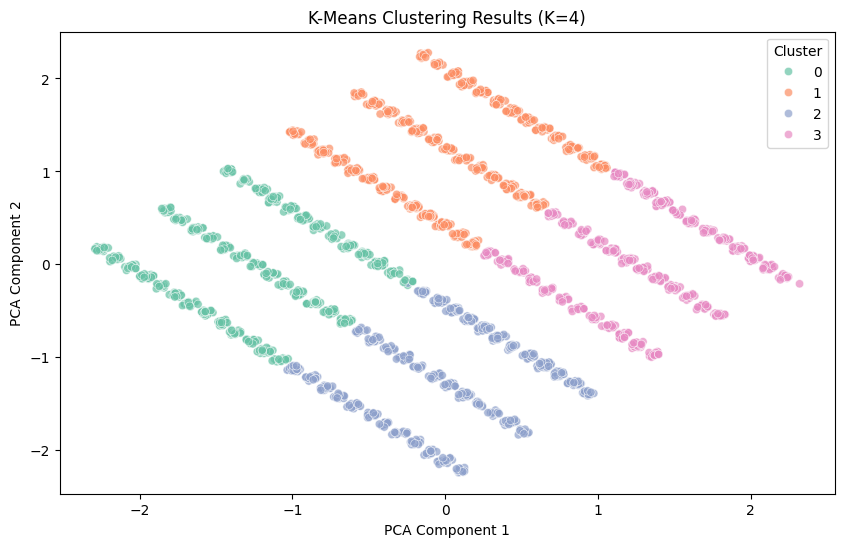

In [26]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(final_data)

pca_clustered_data = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
pca_clustered_data['Cluster'] = final_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_clustered_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7
)
plt.title('K-Means Clustering Results (K=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import numpy as np

final_data['Cluster'] = final_labels

# Clusters with lower average revenue or engagement are at higher risk
cluster_summary = final_data.groupby('Cluster').mean()
print(cluster_summary)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_data.drop(columns=['Cluster']))

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
churn_scores = iso_forest.fit_predict(scaled_data)
final_data['Churn_Prediction'] = churn_scores
final_data['Churn_Prediction'] = final_data['Churn_Prediction'].apply(lambda x: 1 if x == -1 else 0)  # Convert -1 to '1' for churn
churn_summary = final_data.groupby('Cluster')['Churn_Prediction'].mean()
print("Churn prediction rates by cluster:")
print(churn_summary)

         Monthly Revenue       Age  Subscription Type_Premium  \
Cluster                                                         
0              -0.905865  0.854039                   0.266129   
1               0.832058  0.823322                   0.300898   
2              -0.839974 -0.880653                   0.280063   
3               0.925320 -0.901570                   0.327586   

         Subscription Type_Standard  Country_Brazil  Country_Canada  \
Cluster                                                               
0                          0.316129        0.075806        0.127419   
1                          0.309880        0.068862        0.122754   
2                          0.324367        0.068038        0.131329   
3                          0.275862        0.081034        0.125862   

         Country_France  Country_Germany  Country_Italy  Country_Mexico  \
Cluster                                                                   
0              0.066129         

/tmp/ipykernel_47/753863976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_summary.index, y=churn_summary.values, palette='Set2')


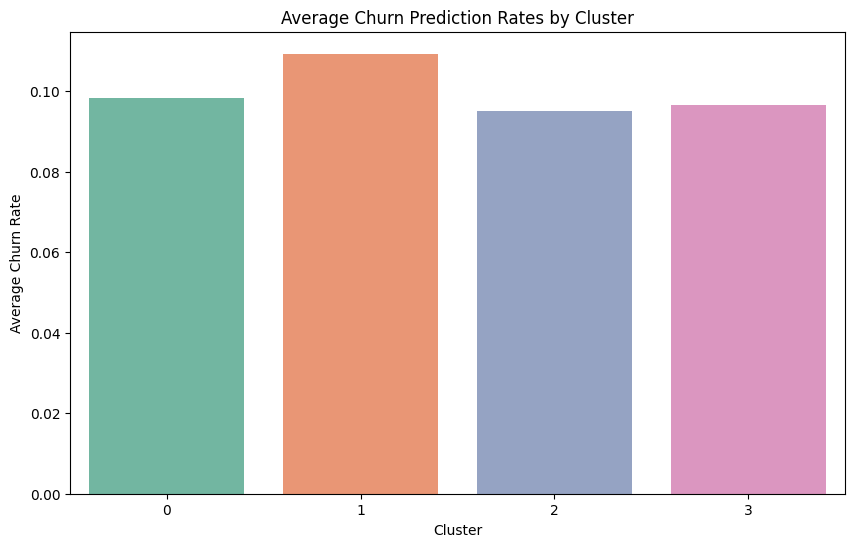

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_summary.index, y=churn_summary.values, palette='Set2')
plt.title('Average Churn Prediction Rates by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Churn Rate')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a5b4bfd-ca80-4e47-8996-e46ecfe92190' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>